<h1 style="font-family:cursive; font-size:18px;background-color: #70dbdb;color:black;text-align:center;padding: 16px">
Name: Pratik Kumar<br>
Role Applied For:Junior Data Scientist Positions</h1>

<div style="color:white;
           display:fill;
           border-radius:6px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.7px">
        <p style="padding: 10px;
              color:white;">
            Dataset Description:<br> 
            Design a Neural Network on IRIS dataset using Feed Forward Neural Network consisting of an input layer L0 consisting of m nodes for m features, two hidden layers L1 and L2 consisting of n and p nodes respectively, and an output layer L3 consisting of k nodes for k classes. Use Softmax Activation Function as Activation Parameter and Categorical Cross-Entropy Loss as Loss Function Design a ANN Model.
            
Expected Result:<br>
                 1. A technical report containing implementation details<br>
                 2. Final parameter values at the end of training<br>
                 3. Train vs Test loss<br>
                 4. Train and Test accuracy<br>
                 5. F1-Score, Classification report & Confusion Matrix<br>
                 6. Plot of the loss function vs. epochs
             </p>
    </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Table of Content<br><br>
            1.Importing necessary libraries & Dataset<br>
            2.Performing Basic Sanity Checks<br>
            3.Feature Scaling<br>
            4.Feature Scaling<br>
            5.Train Test Split & Importing ANN Libraries<br>
            6.Architecture of ANN<br>
            7.Graphs & Plots<br>
            8.Classification Report<br>
            9.Confusion Matrix<br>
        </p>
    </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            1.Importing necessary libraries & Dataset
        </p>
    </div>



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn import metrics

In [2]:
iris=pd.read_csv("IRIS.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id="2.Performing Basic Sanity Checks"></a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            2.Performing Basic Sanity Checks
        </p>
    </div>

In [4]:
display(iris.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

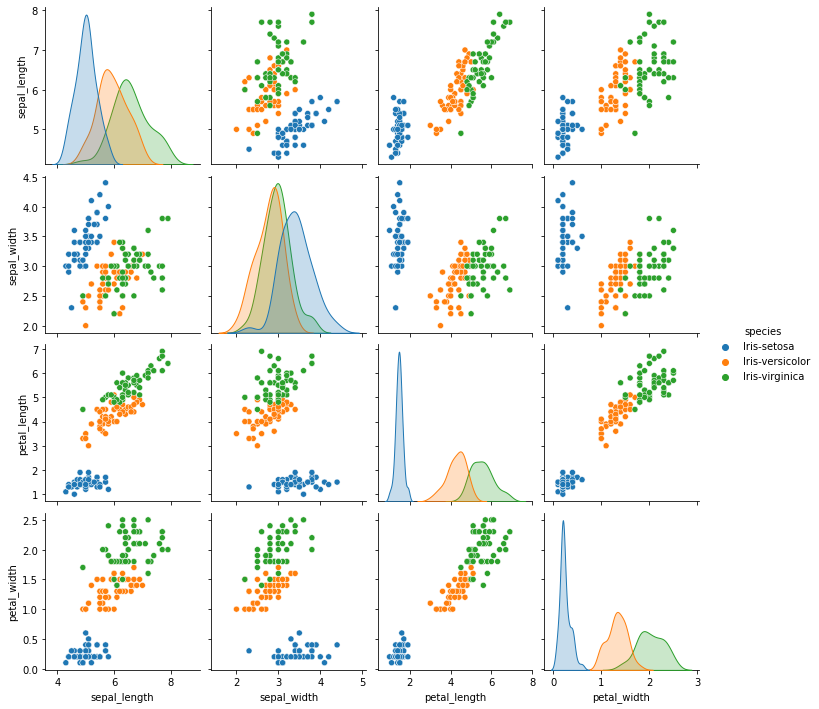

In [7]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=iris, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species' )

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            1.Pairplot to shows the bivariate relationship between each feature along with the datapoint clusters.<br>
            2.We can see that the how different classes are distributed and theirs relationship can be seen with scatter plot.
        </p>
    </div>

In [8]:
X = iris.drop(["species"],axis=1)
y = iris["species"]

<a id="3.Feature Scaling"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            3.Feature Scaling
        </p>
    </div>

In [9]:
X = StandardScaler().fit_transform(X)##Scaling the independent variable
y = LabelBinarizer().fit_transform(y)##Discretization of continous variable

<a id="4.Train Test Split & Importing ANN Libraries"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            4.Train Test Split & Importing ANN Libraries
        </p>
    </div>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential # sequential module reqd to initialize the NN
from keras.layers import Dense,Activation,Dropout 
 # dense module reqd to build the layers of the NN

<a id="5.Architecture of ANN"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            5.Architecture of ANN
        </p>
    </div>

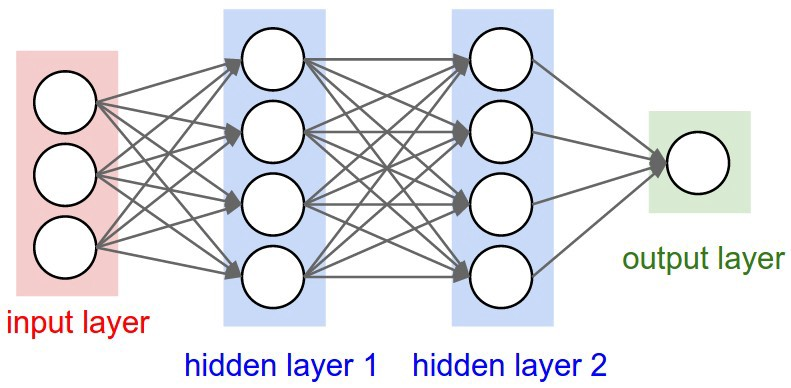

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            a.This ANN consists here are of four layer first and last layer is input and output layer and having two layer 
            in middle which is h1,h2.<br>
            b.The sequential model here will connect together a list of layers in order from first to last.<br>
            c.Using argument units we define how many output we want.Here Lo(Input)consists of 4 nodes,the two hidden                  layer consists of node n=15 & p=8 and an output consists of k=3 nodes.<br>
            d. Dense layers are connected by lines and planes so we need something non-linear which is called activation functions.<br>
            e.After defing a model adding a loss function and optimizer with the model.compile method.
        </p>
    </div>

In [12]:
# Initialising the ANN
iris_model = Sequential()
# creating object of Sequential class

In [13]:
iris_model = Sequential()
iris_model.add(Dense( units = 4, input_dim=4, activation = 'relu'))
iris_model.add(Dense( units = 15, activation= 'relu'))
iris_model.add(Dense( units = 8, activation= 'relu'))
iris_model.add(Dense( units = 3, activation= 'softmax'))
iris_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
iris_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
keras_model = iris_model.fit(X_train,y_train,epochs=200, verbose=1,validation_data=(X_test,y_test)) 

Epoch 1/200
4/4 [==============================] - 1s 195ms/step - loss: 1.0979 - accuracy: 0.4866 - val_loss: 1.0931 - val_accuracy: 0.4474
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 1.0821 - accuracy: 0.4635 - val_loss: 1.0805 - val_accuracy: 0.4474
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0572 - accuracy: 0.5548 - val_loss: 1.0655 - val_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0350 - accuracy: 0.5921 - val_loss: 1.0484 - val_accuracy: 0.5263
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0219 - accuracy: 0.6077 - val_loss: 1.0304 - val_accuracy: 0.6053
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 0.9949 - accuracy: 0.6336 - val_loss: 1.0112 - val_accuracy: 0.6053
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.9700 - accuracy: 0.7115 - val_loss: 0.9930 - val_accuracy: 0.5526
Epoch 8/200
4/4 [==

4/4 [==============================] - 0s 16ms/step - loss: 0.3877 - accuracy: 0.8725 - val_loss: 0.4760 - val_accuracy: 0.6842
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3848 - accuracy: 0.8923 - val_loss: 0.4726 - val_accuracy: 0.6842
Epoch 61/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3889 - accuracy: 0.8735 - val_loss: 0.4674 - val_accuracy: 0.6842
Epoch 62/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3752 - accuracy: 0.8818 - val_loss: 0.4624 - val_accuracy: 0.6842
Epoch 63/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3777 - accuracy: 0.8693 - val_loss: 0.4555 - val_accuracy: 0.6579
Epoch 64/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3449 - accuracy: 0.8979 - val_loss: 0.4499 - val_accuracy: 0.6579
Epoch 65/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3553 - accuracy: 0.8812 - val_loss: 0.4426 - val_accuracy: 0.6842
Epoch 66/200
4/4 [========

4/4 [==============================] - 0s 19ms/step - loss: 0.1225 - accuracy: 0.9618 - val_loss: 0.1566 - val_accuracy: 0.9474
Epoch 118/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1034 - accuracy: 0.9743 - val_loss: 0.1535 - val_accuracy: 0.9474
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1153 - accuracy: 0.9649 - val_loss: 0.1513 - val_accuracy: 0.9474
Epoch 120/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1004 - accuracy: 0.9763 - val_loss: 0.1492 - val_accuracy: 0.9474
Epoch 121/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0987 - accuracy: 0.9763 - val_loss: 0.1479 - val_accuracy: 0.9474
Epoch 122/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1013 - accuracy: 0.9670 - val_loss: 0.1460 - val_accuracy: 0.9474
Epoch 123/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1060 - accuracy: 0.9586 - val_loss: 0.1431 - val_accuracy: 0.9474
Epoch 124/200
4/4 [=

Epoch 175/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0533 - accuracy: 0.9943 - val_loss: 0.0901 - val_accuracy: 0.9737
Epoch 176/200
4/4 [==============================] - 0s 17ms/step - loss: 0.0529 - accuracy: 0.9943 - val_loss: 0.0903 - val_accuracy: 0.9737
Epoch 177/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0485 - accuracy: 0.9964 - val_loss: 0.0904 - val_accuracy: 0.9737
Epoch 178/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0511 - accuracy: 0.9964 - val_loss: 0.0906 - val_accuracy: 0.9737
Epoch 179/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.9964 - val_loss: 0.0920 - val_accuracy: 0.9737
Epoch 180/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0555 - accuracy: 0.9762 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 181/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0473 - accuracy: 0.9887 - val_loss: 0.0936 - val_accuracy: 0.9737
Epoch 

<a id="6.Graphs & Plots"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            6.Graphs & Plots
        </p>
    </div>

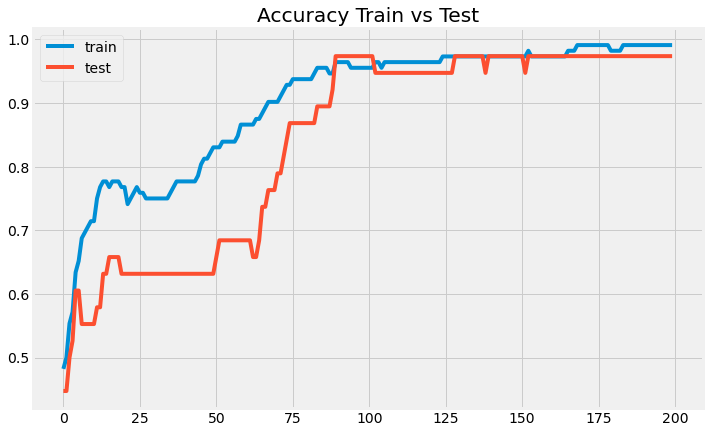

In [16]:
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
plt.plot(keras_model.history['accuracy'])
plt.plot(keras_model.history['val_accuracy'])
plt.title("Accuracy Train vs Test")
plt.legend(['train', 'test'])
plt.show()

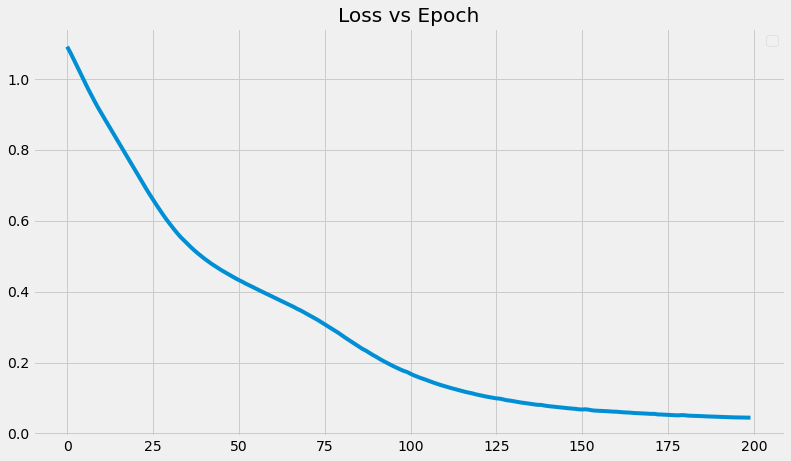

In [17]:
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
history_df = pd.DataFrame(keras_model.history)
plt.legend(['test'])
plt.title("Loss vs Epoch")
history_df['loss'].plot();

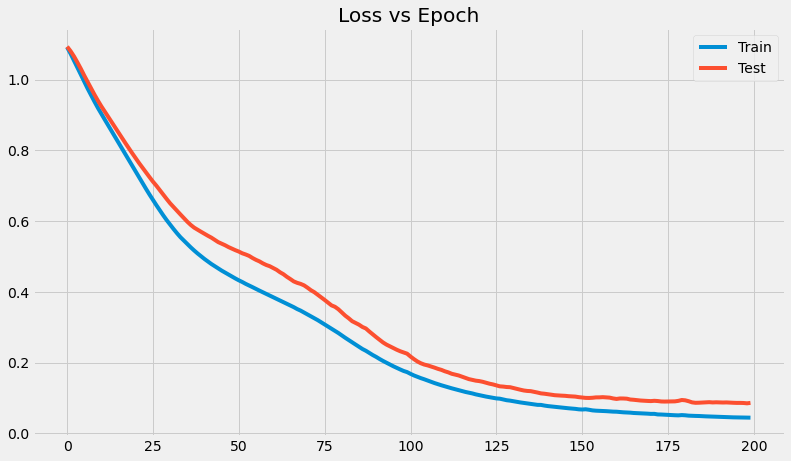

In [18]:
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
plt.plot(keras_model.history['loss'])
plt.plot(keras_model.history['val_loss'])
plt.title('Loss vs Epoch')
plt.legend(['Train','Test'])
plt.show()

<a id="7.Classification Report"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            7.Predicting the test results with f1 score
        </p>
    </div>

In [19]:
ann_prediction = iris_model.predict(X_test)
iris_test_class = np.argmax(y_test, axis=1)
iris_pred_class = np.argmax(ann_prediction, axis=1)

In [20]:
##Classification report 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(iris_test_class, iris_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<a id="8.Confusion Matrix"><a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            8. Confusion Matrix
        </p>
    </div>

<AxesSubplot:>

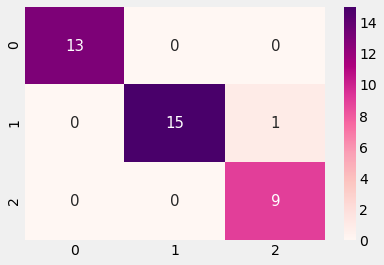

In [21]:
#Confusion Matrix
sns.heatmap(confusion_matrix(iris_test_class, iris_pred_class),cmap = 'RdPu', annot = True, annot_kws = {'size':15})